# $\text{Exact diagonalization of the } \phi \text{ Hamiltonian} - E \text{ } vs \text{ } E_J$

In [1]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math

In [2]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [3]:
#Construction of necessary elements of theta and phi Hilbert spaces

# For phi

# For theta

M=20
Id_M=np.eye(2*M+1)
n_theta=np.flipud(np.fliplr(np.diag(np.arange(-M,M+1), 0)))

# Qubit parameters

ng_value=0.5

# Qubit parameters 1

E_Cs=1.0
E_J_value=1.0
E_Cj=1.0
E_L=1.0

#Qubit parameters 2

E_Cs_2=(1.0/20)
E_J_2_value=(1.0/5.0)
E_Cj_2=1.0
E_L_2=(1.0/16)

#For E_J calculations

E_J=np.arange(0,1.2,0.2)#1.2
EnergiesEJ=[]
E_J_2=np.arange(0,0.41,0.05)#0.41
Energies2EJ=[]

#For ng calculations

ng=np.arange(0.4,0.69,0.1)
#ng=np.arange(0.4,0.61,0.01)
#ng=np.arange(-1.00,1.00,0.01)
Energiesng=[]
ng2=np.arange(0.4,0.69,0.1)
#ng2=np.arange(0.4,0.61,0.01)
Energies2ng=[]

In [4]:
# Construction of the 0-pi Hamiltonian

def Hamiltonian_0pi(EJ,ECS,ECJ,EL,n):
    #Initial
    H=np.zeros((2*M+1,2*M+1))   #,dtype=complex
    H_theta=4*ECS*((n_theta-n*Id_M)@(n_theta-n*Id_M))
    #Interaction Hamiltonian construction
    cos_theta=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1)
    cos_theta[0][2*M]+=1
    cos_theta[2*M][0]+=1
    H_I=EJ*cos_theta #HE QUITADO EL DOOOOOOOOOSSSSSS
    #H_I=np.zeros(((N+1),(N+1)))
    #Total Hamiltonian
    H+=H_theta-H_I  #.astype(complex)
    return H

In [5]:
cos_theta=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1)
cos_theta[0][2*M]+=1
cos_theta[2*M][0]+=1
Hprueba=np.zeros((2*M+1,2*M+1))+4*E_Cs*((n_theta-ng_value*Id_M)@(n_theta-ng_value*Id_M))-E_J_value*cos_theta
N=5
P=np.kron(Hprueba,np.eye(N+1))
print(len(P))

246


In [6]:
# Construction of the theta Hamiltonian eq (38)

#def Hamiltonian_0pi(EJ,ECS,ECJ,EL,n):
    #Initial
#    H=np.zeros((2*M+1,2*M+1))   #,dtype=complex
#    H_theta=0.5*ECS*((n_theta-n*Id_M)@(n_theta-n*Id_M))
    #Interaction Hamiltonian construction
#    cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
#    cos_theta[0][2*M]+=1
#    cos_theta[2*M][0]+=1
#    H_I=0.5*EJ*cos_theta #HE QUITADO EL DOOOOOOOOOSSSSSS
    #H_I=np.zeros(((N+1),(N+1)))
    #Total Hamiltonian
#    H+=H_theta+H_I  #.astype(complex)
#    return H

## $\text{1. Plot for }$ $E_{Cs} = E_{CJ} = E_L = 1$, $n_g = \frac{1}{2}$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = i$.

In [7]:
#Calculation 1

for EJ1 in E_J:
    print("Step for EJ = ",EJ1)
    H_0pi=Hamiltonian_0pi(EJ1,E_Cs,E_Cj,E_L,ng_value)
    print(H_0pi)
    print("Hamiltonian built, len(H)=",len(H_0pi)**2)
    vals, _ = eigsh(H_0pi, k=12, which='SA')
    #vals,_=np.linalg.eigh(H_0pi)
    print("1st and 2nd degenerated vals are",vals[0], vals[1],"3rd and 4th degenerated vals", vals[2], vals[3])
    print("Eigenvalues calculated")
    #vals,vects=np.linalg.eigh(H)
    EnergiesEJ.append(vals) #-vals[0]

Step for EJ =  0.0
[[1521.    0.    0. ...    0.    0.    0.]
 [   0. 1369.    0. ...    0.    0.    0.]
 [   0.    0. 1225. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 1369.    0.    0.]
 [   0.    0.    0. ...    0. 1521.    0.]
 [   0.    0.    0. ...    0.    0. 1681.]]
Hamiltonian built, len(H)= 1681
1st and 2nd degenerated vals are 0.9999999999999686 1.0000000000000584 3rd and 4th degenerated vals 8.999999999999801 9.000000000000037
Eigenvalues calculated
Step for EJ =  0.2
[[ 1.521e+03 -2.000e-01  0.000e+00 ...  0.000e+00  0.000e+00 -2.000e-01]
 [-2.000e-01  1.369e+03 -2.000e-01 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00 -2.000e-01  1.225e+03 ...  0.000e+00  0.000e+00  0.000e+00]
 ...
 [ 0.000e+00  0.000e+00  0.000e+00 ...  1.369e+03 -2.000e-01  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00 ... -2.000e-01  1.521e+03 -2.000e-01]
 [-2.000e-01  0.000e+00  0.000e+00 ...  0.000e+00 -2.000e-01  1.681e+03]]
Hamiltonian built, len(H)= 1681
1st and 2nd degenerated vals ar

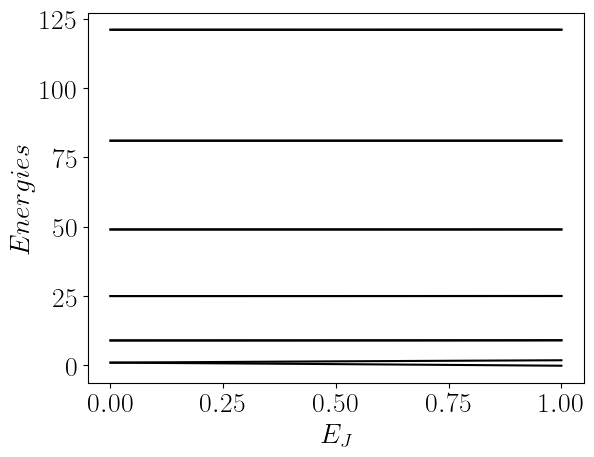

In [8]:
#Plot 1

plt.plot(E_J,EnergiesEJ,c="k")
#plt.ylim(-10,140)
#plt.ylim(1.7,4.2)
#plt.xlim(-0.05,0.4)
plt.xlabel('$E_J$')
plt.ylabel('$Energies$')
#plt.savefig('2THETA_Energies_vs_EJ_M100_EQ38ALBA.pdf')
plt.show()

In [9]:
for n1 in ng:
    print("Step for phi_ext = ",n1)
    H=Hamiltonian_0pi(E_J_value,E_Cs,E_Cj,E_L,n1)
    print("Hamiltonian built, len(H)=",len(H)**2)
    #vals,vects=np.linalg.eigh(H)
    valsng, _ = eigsh(H, k=4, which='SA')
    #valsng,_=np.linalg.eigh(H)
    print(valsng[0],valsng[1],valsng[2],valsng[3])
    print("Eigenvalues calculated")
    Energiesng.append(valsng)

Step for phi_ext =  0.4
Hamiltonian built, len(H)= 1681
-0.15371027596092954 1.979797199469494 7.91403844617435 10.294527388465385
Eigenvalues calculated
Step for phi_ext =  0.5
Hamiltonian built, len(H)= 1681
-0.11024881699219002 1.8591080725142672 9.047739259809367 9.078368847203741
Eigenvalues calculated
Step for phi_ext =  0.6
Hamiltonian built, len(H)= 1681
-0.15371027596108164 1.9797971994695363 7.914038446174199 10.294527388465596
Eigenvalues calculated


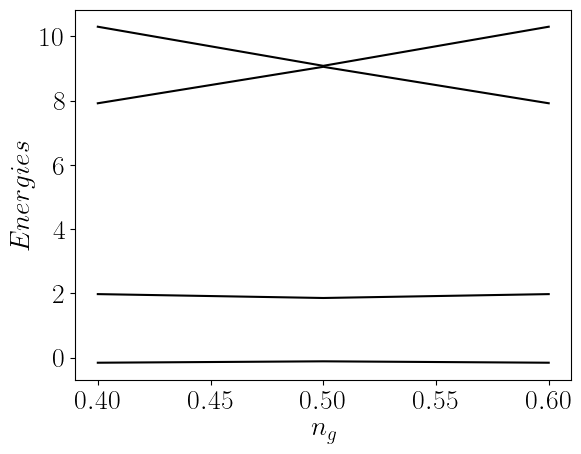

In [10]:
#Plot 1 

plt.plot(ng,Energiesng,c="k")
#plt.ylim(-2,11)
#plt.xlim(-1,1)
#plt.ylim(-0.5,5)
plt.xlabel('$n_g$')
plt.ylabel('$Energies$')
#plt.savefig('2THETA_Energies_vs_ng_M100_EQ38ALBA.pdf')
plt.show()

## $\text{2. Plot for }$ $E_{Cs} = \frac{1}{20}$, $E_{CJ} = 1$, $E_L = \frac{1}{16}$, $n_g = \frac{1}{2}$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = 2i$.

In [11]:
#Calculation 2

for EJ2 in E_J_2:
    print("Step for EJ = ",EJ2)
    H_0pi_2=Hamiltonian_0pi(EJ2,E_Cs_2,E_Cj_2,E_L_2,ng_value)
    print("Hamiltonian built, len(H)=",len(H_0pi_2)**2)
    vals2, _ = eigsh(H_0pi_2, k=12, which='SA')
    #vals2,_=np.linalg.eigh(H_0pi_2)
    print("1st and 2nd degenerated vals are",vals2[0], vals2[1],"3rd and 4th degenerated vals", vals2[2], vals2[3])
    print("Eigenvalues calculated")
    #vals2,vects2=np.linalg.eigh(H2)
    Energies2EJ.append(vals2)

Step for EJ =  0.0
Hamiltonian built, len(H)= 1681
1st and 2nd degenerated vals are 0.04999999999999915 0.05000000000000782 3rd and 4th degenerated vals 0.4499999999999996 0.4500000000000027
Eigenvalues calculated
Step for EJ =  0.05
Hamiltonian built, len(H)= 1681
1st and 2nd degenerated vals are -0.005512440849609134 0.09295540362571493 3rd and 4th degenerated vals 0.4523869629904658 0.4539184423601579
Eigenvalues calculated
Step for EJ =  0.1
Hamiltonian built, len(H)= 1681
1st and 2nd degenerated vals are -0.06953382506126585 0.11895999402443135 3rd and 4th degenerated vals 0.45703138688830264 0.46851612418105637
Eigenvalues calculated
Step for EJ =  0.15000000000000002
Hamiltonian built, len(H)= 1681
1st and 2nd degenerated vals are -0.13926898499138518 0.12595195437542173 3rd and 4th degenerated vals 0.46115664241339843 0.4957753145226138
Eigenvalues calculated
Step for EJ =  0.2
Hamiltonian built, len(H)= 1681
1st and 2nd degenerated vals are -0.21295914502804433 0.1159004085053

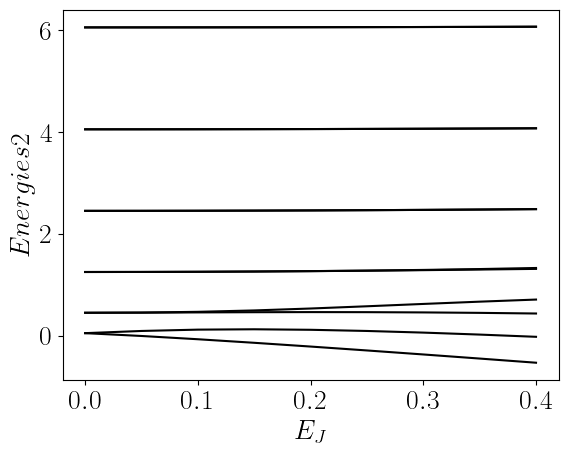

In [12]:
#Plot 2

plt.plot(E_J_2,Energies2EJ,c="k")
#plt.ylim(-1,7)
#plt.xlim(-0.02,0.42)
plt.xlabel('$E_J$')
plt.ylabel('$Energies2$')
#plt.savefig('THETA_Energies2_vs_EJ_M1000_INTNO2.pdf')
plt.show()

In [13]:
#Calculations 2 

for n2 in ng2:
    print("Step for ng = ",n2)
    H2=Hamiltonian_0pi(E_J_2_value,E_Cs_2,E_Cj_2,E_L_2,n2)
    print("Hamiltonian built, len(H)=",len(H2)**2)
    #vals2ng,_=np.linalg.eigh(H2)
    vals2ng, _ = eigsh(H2, k=4, which='SA')
    print(vals2ng[0],vals2ng[1],vals2ng[2],vals2ng[3])
    print("Eigenvalues calculated")
    Energies2ng.append(vals2ng)

Step for ng =  0.4
Hamiltonian built, len(H)= 1681
-0.2130620399025861 0.11766225754100945 0.43846245367623565 0.5642318122447267
Eigenvalues calculated
Step for ng =  0.5
Hamiltonian built, len(H)= 1681
-0.21295914502804683 0.11590040850531846 0.4630723066053099 0.533551355176023
Eigenvalues calculated
Step for ng =  0.6
Hamiltonian built, len(H)= 1681
-0.2130620399025864 0.11766225754100099 0.43846245367623515 0.5642318122447239
Eigenvalues calculated


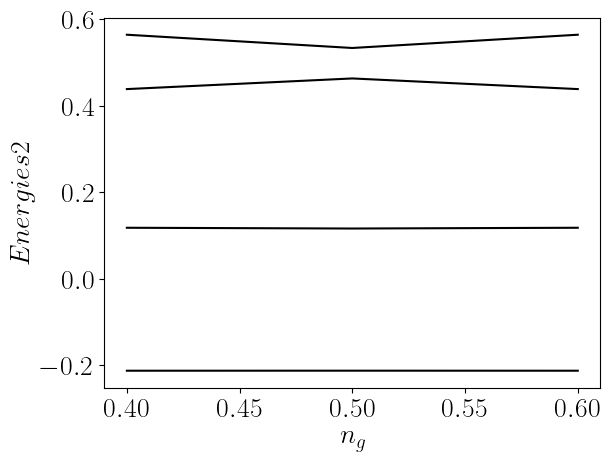

In [14]:
#Plot 2 

plt.plot(ng2,Energies2ng,c="k")
#plt.ylim(-0.4,0.7)
plt.xlabel('$n_g$')
plt.ylabel('$Energies2$')
#plt.savefig('THETA_Energies2_vs_ng_M1000_INTNO2.pdf')
plt.show()

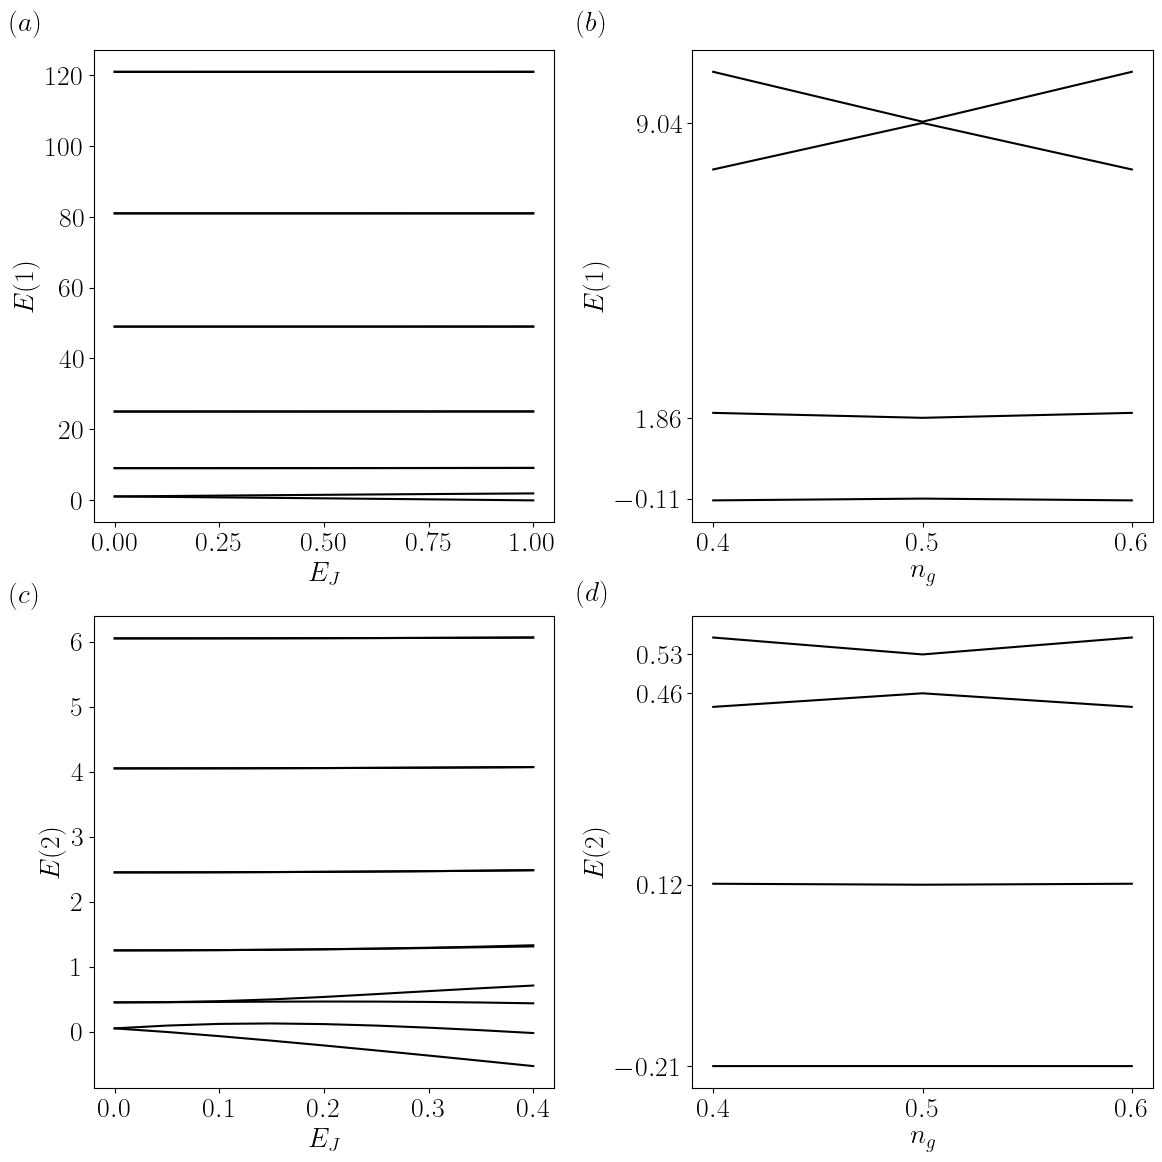

In [38]:
# Create the figure and subplots
fig = plt.figure(figsize=(12, 12))

# Plot 1
ax1 = fig.add_subplot(221)
ax1.plot(E_J, EnergiesEJ, c="k")
ax1.set_xlabel('$E_J$')
ax1.set_ylabel('$E (1)$')
ax1.text(-0.25,132.5,r'$(a)$', fontsize=20)

# Plot 2
ax2 = fig.add_subplot(222)
ax2.plot(ng, Energiesng, c="k")
ax2.set_xlabel('$n_g$')
ax2.set_ylabel('$E (1)$')
ax2.set_xticks([0.4, 0.5, 0.6])
ax2.set_xticklabels([r"$0.4$", r"$0.5$", r"$0.6$"])
ax2.set_yticks([-0.11024881699219002, 1.8591080725142672, 9.047739259809367])
ax2.set_yticklabels([r"$-0.11$", r"$1.86$", r"$9.04$"])
ax2.text(0.335,11.3,r'$(b)$', fontsize=20)

# Plot 3
ax3 = fig.add_subplot(223)
ax3.plot(E_J_2, Energies2EJ, c="k")
ax3.set_xlabel('$E_J$')
ax3.set_ylabel('$E (2)$')
ax3.text(-0.1,6.6,r'$(c)$', fontsize=20)

# Plot 4
ax4 = fig.add_subplot(224)
ax4.plot(ng2, Energies2ng, c="k")
ax4.set_xlabel('$n_g$')
ax4.set_ylabel('$E (2)$')
ax4.set_xticks([0.4, 0.5, 0.6])
ax4.set_xticklabels([r"$0.4$", r"$0.5$", r"$0.6$"])
ax4.set_yticks([-0.21295914502804683, 0.11590040850531846, 0.4630723066053099,0.533551355176023])
ax4.set_yticklabels([r"$-0.21$", r"$0.12$", r"$0.46$",r"$0.53$"])
ax4.text(0.335,0.63,r'$(d)$', fontsize=20)


# Adjust the spacing between subplots
fig.tight_layout()
fig.subplots_adjust(wspace=0.3,hspace=0.2)

# Show the figure
#plt.savefig('THETA_Energies_vs_EJ&ng_M20_INTNO2.png',dpi=300,bbox_inches='tight')
plt.show()
